<a href="https://colab.research.google.com/github/estebanhernandezr/Entregas-Semanales/blob/main/Scripts_capstone.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **imports**

In [ ]:
import psycopg2
import pandas as pd
import matplotlib.pyplot as plt

## **functions**

### **data base connection**

In [ ]:
def db_selection(what, where):
    engine = None
    resultDataFrame = None
    try:
        engine = psycopg2.connect(
            database = "UDriveDB",
            user = "UDriveAdmin",
            password = "UDriveAdmin10",
            host = "database-1.ct0kpzfxpmof.us-east-1.rds.amazonaws.com",
            port = "5432"
        )
        data = pd.read_sql_query("SELECT "+what+" FROM "+where+";", engine)
        resultDataFrame = pd.DataFrame(data)
    except(Exception, psycopg2.DatabaseError) as error:
        print("Error:", error)
        raise(ValueError(Exception))
    finally:
          if engine is not None:
              engine.close()
          return resultDataFrame

### **visualize the general state of the data base**

In [154]:
def count_column_values(dataframe, col):
    return dataframe[col].value_counts()

def plot_count(dataframe, col):
    plt.title(col)
    conteo = pd.DataFrame(count_column_values(dataframe, col))
    plt.barh(conteo.index.values.tolist(), conteo.loc[:, col])
    plt.plot(conteo.loc[:, col], conteo.index.values.tolist(), '-o', color='orange')
    plt.xlabel('repetición del valor')
    plt.ylabel('valor')
    plt.show()

def plot_count_frecuencies(dataframe, col):
    bar_width = 0.5

    plt.title(col)
    conteo = pd.DataFrame(count_column_values(dataframe, col))
    #print(conteo)
    conteo_conteo = pd.DataFrame(count_column_values(conteo, col))
    conteo_conteo = conteo_conteo.sort_values(by=[col])
    #print(conteo_conteo)
    plt.bar(conteo_conteo.index.values.tolist(), conteo_conteo.loc[:, col], width=bar_width/2)
    plt.plot(conteo_conteo.index.values.tolist(), conteo_conteo.loc[:, col], '-o', color='orange')
    plt.xlabel('repetición de tamaño...')
    plt.ylabel('repetición de la repetición')
    plt.show()

In [157]:
def visualize_general_info(dataframe, col):
    plot_count(dataframe, col)
    plot_count_frecuencies(dataframe, col)

## **main**

In [167]:
def main():
    usuariosDF = db_selection('*', 'Usuario')
    visualize_general_info(dataframe=usuariosDF, col='pwd')

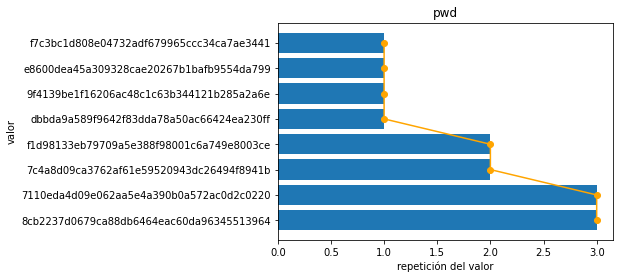

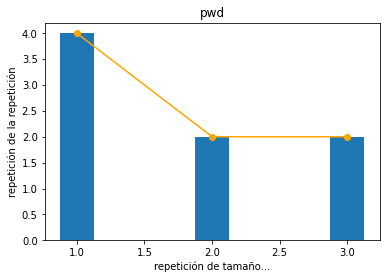

In [168]:
main()

## **tests suite**

In [ ]:
usuariosDF = db_selection('*', 'Usuario')
usuariosDF

,id_usuario,nombre,apellido,celular,pwd,email,calificacion,picture,create_by,create_on
0,8,Fidel Castro,None,3008512552,8cb2237d0679ca88db6464eac60da96345513964,fidelin@gmail.com,3,None,sys,03:27:53.028703
1,9,Oscar Velasco,None,3222328874,7c4a8d09ca3762af61e59520943dc26494f8941b,chiquillo@gmail.com,3,None,sys,05:09:18.669253
2,10,juan Ladino,None,3058996370,f1d98133eb79709a5e388f98001c6a749e8003ce,juane.ladino0209@gmail.com,3,None,sys,05:09:37.448520
3,11,Oscar Velasco,None,3222328874,dbbda9a589f9642f83dda78a50ac66424ea230ff,oscarvch@hotmail.es,3,None,sys,15:43:31.177930
4,12,hebreo salidas,None,3058996370,f1d98133eb79709a5e388f98001c6a749e8003ce,hebreo@gmail.com,3,None,sys,15:43:47.646820
5,13,Michael Hernández,None,3158624052,9f4139be1f16206ac48c1c63b344121b285a2a6e,gerar1616@hotmail.com,3,None,sys,16:15:11.248332
6,15,mario jimenez,None,3005668965,8cb2237d0679ca88db6464eac60da96345513964,mario@urosario.com,3,None,sys,16:17:18.672690
7,18,Michael Hernández,None,3158624052,e8600dea45a309328cae20267b1bafb9554da799,gerard1616@hotmail.com,3,None,sys,16:19:50.462029
8,19,Michael Hernández,None,3158624052,7110eda4d09e062aa5e4a390b0a572ac0d2c0220,gerard1616@yahoo.com,3,None,sys,16:19:57.545973
9,20,Camila Fernández,None,3280646738,8cb2237d0679ca88db6464eac60da96345513964,camila@gmail.com,3,None,sys,16:24:17.090778
